In [3]:
import loader
import network2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def ANN(name,model):
    
    target = model[-1] #9 for decades, 90 for years
    epochs = 30
    
    #Load the data file
    trn, tst = loader.load_data_wrapper(target)

    #Initialize the network and call SGD
    net = network2.Network(model, cost=network2.QuadraticCost) 
    net.large_weight_initializer()

    tst_cst, tst_acc, trn_cst, trn_acc, diff, sqdiff =\
    net.SGD(training_data=trn, evaluation_data=tst, epochs=epochs, 
            mini_batch_size=10, eta=0.5, lmbda=0.1, target=target)

    #Write numbers to a file 
    fo=open("results.txt","a")
    np.savetxt(fo,np.array((tst_cst, tst_acc, trn_cst, trn_acc, diff, sqdiff)),delimiter=',',header=name)
    fo.close()

    #Draw plots
    plt.plot(xrange(0,epochs),tst_acc,label="Test Accuracy")
    plt.plot(xrange(0,epochs),trn_acc,label="Training Accuracy")
    plt.title("Accuracy: "+name)
    plt.legend(loc=0)
    plt.show()

    plt.plot(xrange(0,epochs),tst_cst,label="Test Cost")
    plt.plot(xrange(0,epochs),trn_cst,label="Training Cost")
    plt.title("Cost: "+name)
    plt.legend(loc=0)
    plt.show()

    plt.plot(xrange(0,epochs),diff,label="Diff")
    plt.plot(xrange(0,epochs),sqdiff,label="SqDiff")
    plt.title("Diff: "+name)
    plt.legend(loc=0)
    plt.show()

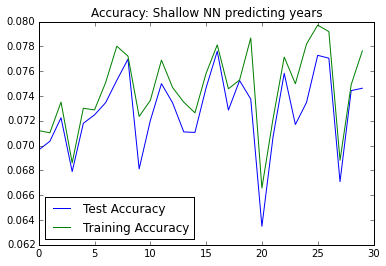

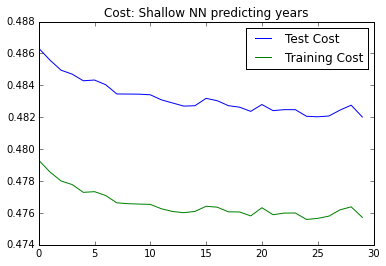

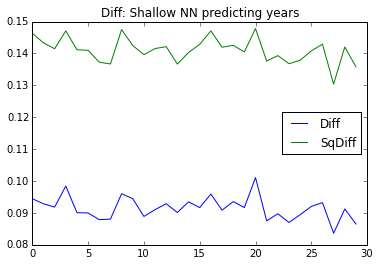

In [2]:
ANN("Shallow NN predicting years",[90,90])

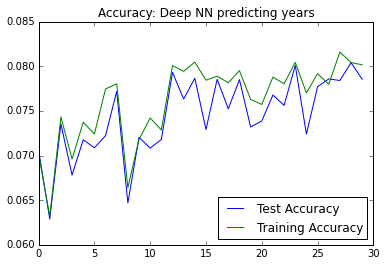

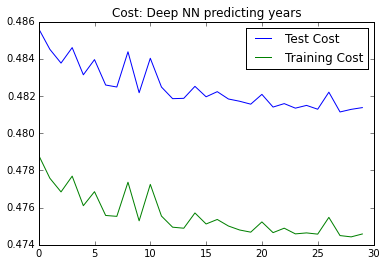

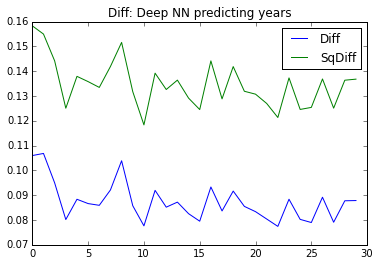

In [3]:
ANN("Deep NN predicting years",[90,45,90])

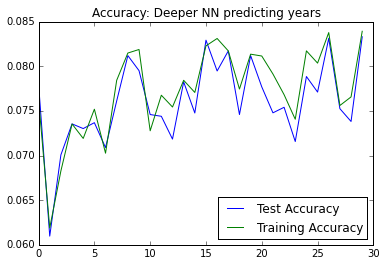

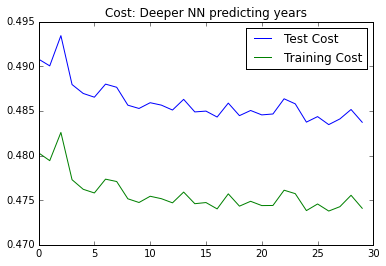

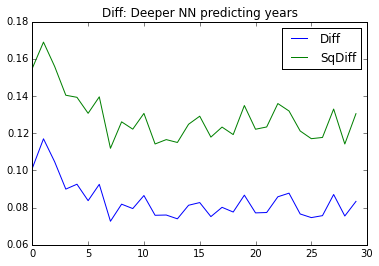

In [4]:
ANN("Deeper NN predicting years",[90,60,45,90])

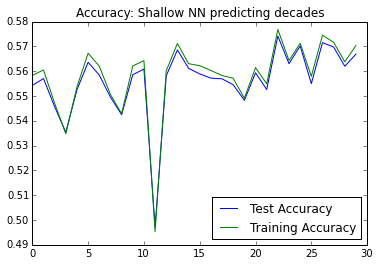

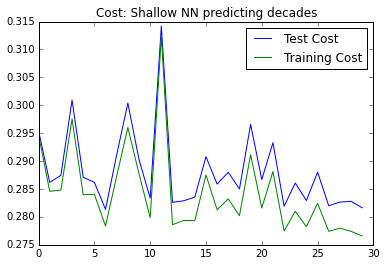

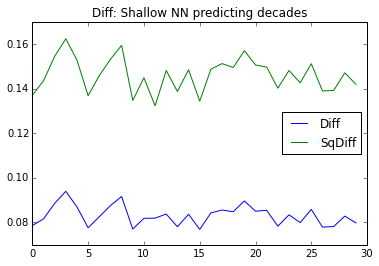

In [4]:
ANN("Shallow NN predicting decades",[90,9])

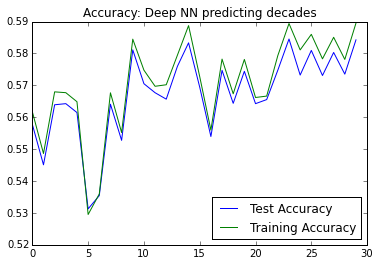

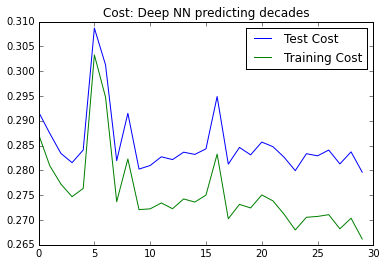

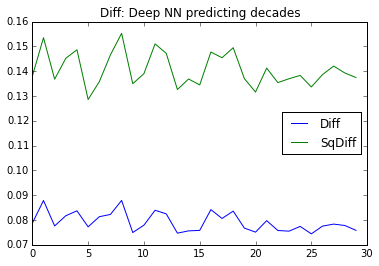

In [5]:
ANN("Deep NN predicting decades",[90,45,9])

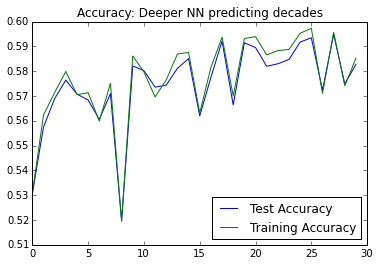

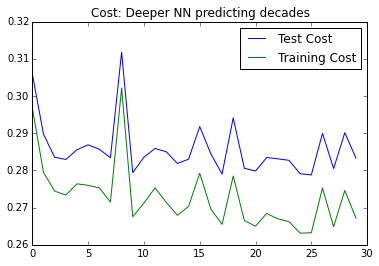

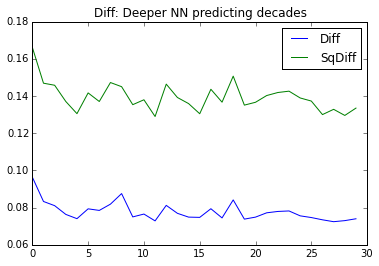

In [6]:
ANN("Deeper NN predicting decades",[90,60,45,9])